# Analyzing Screen Time 

#### For the task of analyzing the screen time of a user, we need data about the app usage activity of a user on a particular device. I found an ideal dataset for this task, which contains features like:

- Date: The date on which the data was recorded.
- App: The name of the application being used (e.g., Instagram, WhatsApp).
- Usage (minutes): The total number of minutes spent on the app daily.
- Notifications: The number of notifications received from the app each day.
- Times Opened: The number of times the app was opened on the recorded day.

Dataset Link : https://statso.io/screen-time-case-study/

#### **PROBLEM**

##### Aims to analyze trends and patterns in screen time usage

In [ ]:

import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv("C://Users//USER//Downloads//screentime_analysis.csv")

In [5]:
df

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16
...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1


In [6]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [7]:
df.info

<bound method DataFrame.info of            Date        App  Usage (minutes)  Notifications  Times Opened
0    2024-08-07  Instagram               81             24            57
1    2024-08-08  Instagram               90             30            53
2    2024-08-26  Instagram              112             33            17
3    2024-08-22  Instagram               82             11            38
4    2024-08-12  Instagram               59             47            16
..          ...        ...              ...            ...           ...
195  2024-08-10   LinkedIn               22             12             5
196  2024-08-23   LinkedIn                5              7             1
197  2024-08-18   LinkedIn               19              2             5
198  2024-08-26   LinkedIn               21             14             1
199  2024-08-02   LinkedIn               13              4             1

[200 rows x 5 columns]>

In [ ]:
# Checking for missing values in each column
df.isna().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

In [ ]:
# Counting occurrences of each app in the dataset
df['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

In [ ]:
# Getting the index (unique app names) for visualization
df['App'].value_counts().index

Index(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'],
      dtype='object', name='App')

<Axes: xlabel='App', ylabel='count'>

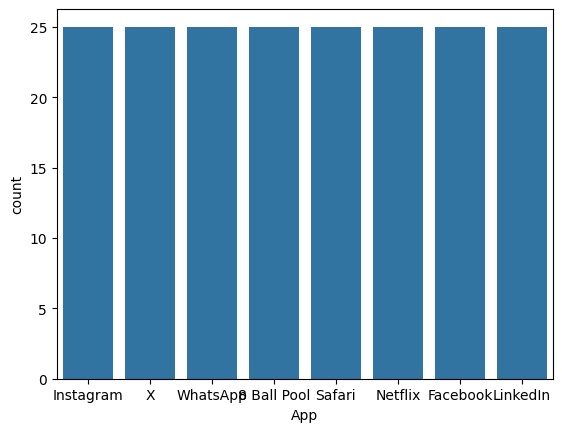

In [ ]:
# Visualizing app frequency using a count plot
sns.countplot(x = 'App', data = df )

<Axes: xlabel='Times Opened', ylabel='Usage (minutes)'>

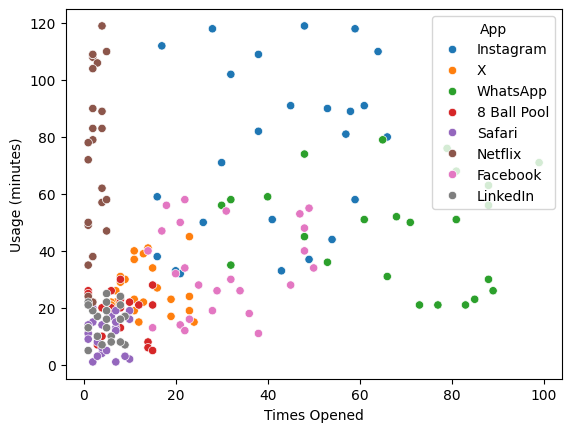

In [ ]:
# Scatter plot to explore the relationship between times opened and usage duration
sns.scatterplot(x = 'Times Opened', y = 'Usage (minutes)', hue= "App" , data = df)

In [ ]:
# Grouping data by app and summing numerical columns
df_grouped = df.groupby('App').sum(numeric_only=True).reset_index()

In [ ]:
# Setting app names as the index for further analysis
df_grouped = df_grouped.set_index('App')
df_grouped

,Usage (minutes),Notifications,Times Opened
App,,,
8 Ball Pool,452,113,182
Facebook,842,993,755
Instagram,1898,1245,1039
LinkedIn,390,223,119
Netflix,1819,11,64
Safari,270,18,132
WhatsApp,1204,2498,1706
X,675,646,329


<Axes: ylabel='App'>

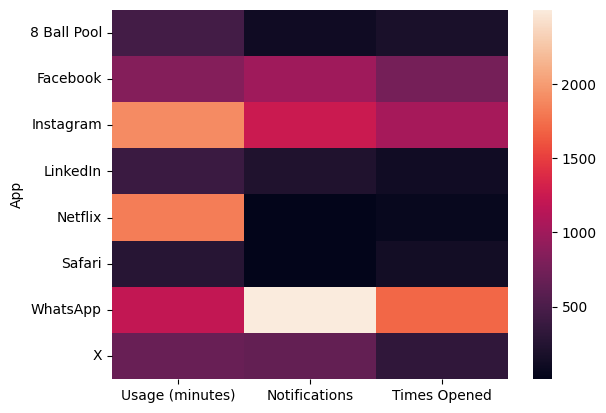

In [15]:
sns.heatmap(df_grouped)

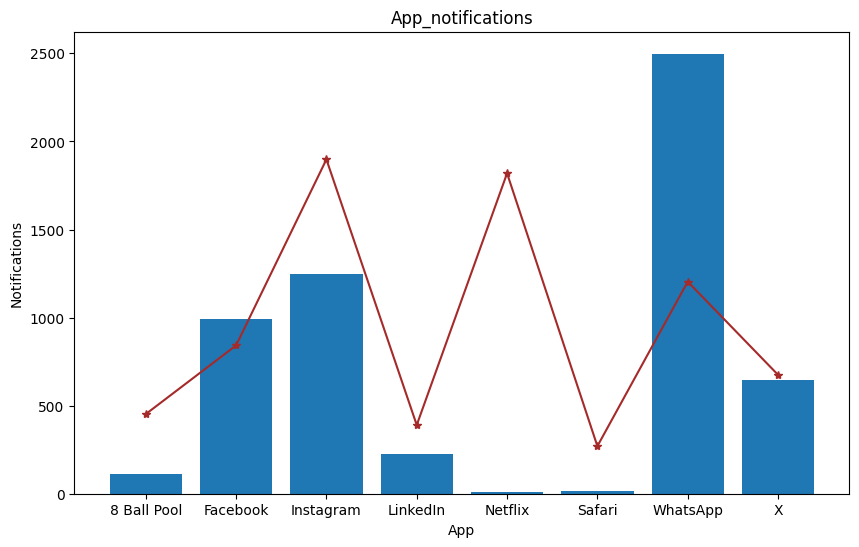

In [ ]:
values = df_grouped['Notifications']
usage = df_grouped['Usage (minutes)']

# Bar and line plot to compare notifications and usage for each app
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index,values)
plt.plot(df_grouped.index,usage, color="Brown", label="Line Plot", marker = "*")

plt.xlabel('App')
plt.ylabel('Notifications')
plt.title('App_notifications')


plt.show()


In [ ]:

# Line plot to show screen time trends over time for different apps

df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16
...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1


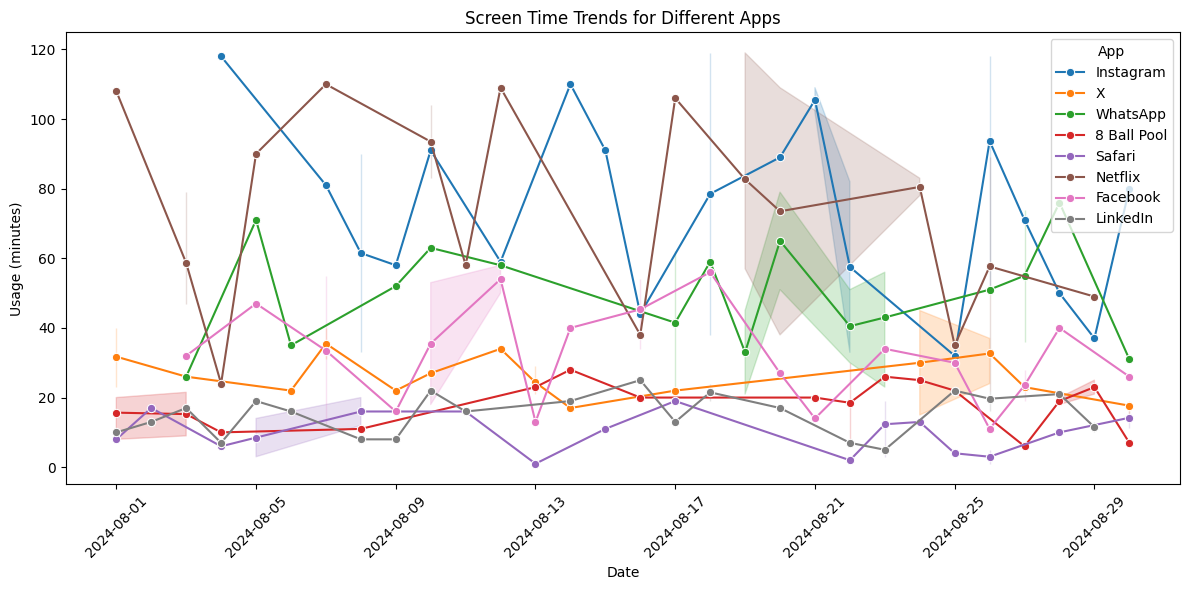

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=df, marker="o")
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

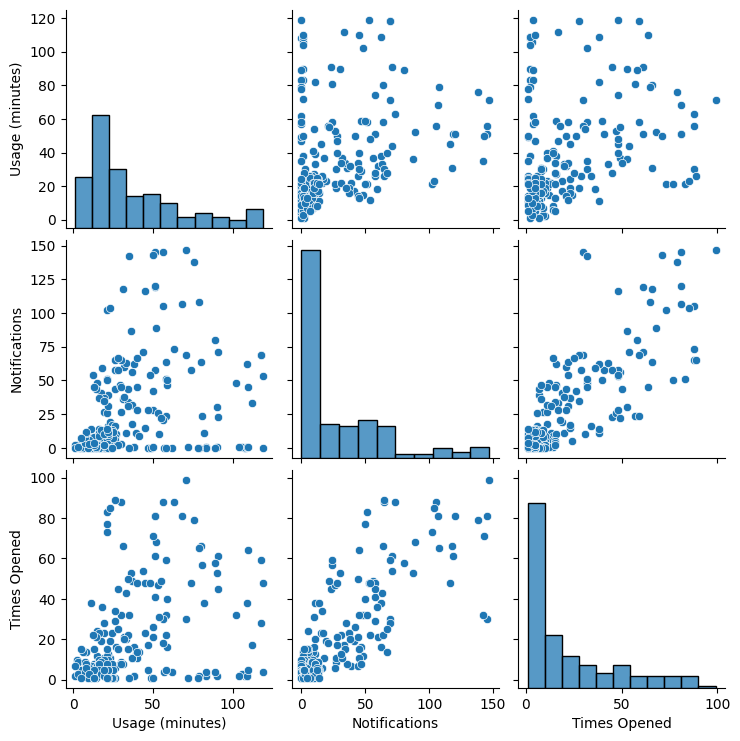

In [20]:
plt.figure(figsize=(8, 6))

sns.pairplot( df[['Usage (minutes)', 'Notifications', 'Times Opened']], )

In [ ]:
# Aggregating data to calculate average metrics for each app
app_analysis = df.groupby('App').agg(
    avg_usage = ('Usage (minutes)','mean'),
    avg_notifications = ('Notifications' , 'mean'),
    avg_times_opened = ('Times Opened', 'mean')).reset_index()



In [25]:
app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
0,8 Ball Pool,18.08,4.52,7.28
1,Facebook,33.68,39.72,30.20
2,Instagram,75.92,49.80,41.56
3,LinkedIn,15.60,8.92,4.76
4,Netflix,72.76,0.44,2.56
5,Safari,10.80,0.72,5.28
6,WhatsApp,48.16,99.92,68.24
7,X,27.00,25.84,13.16


In [26]:
app_analysis = app_analysis.sort_values(by='avg_usage', ascending= False)

In [27]:
app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


In [28]:
df['Day of week'] =  df['Date'].dt.day_name()

In [29]:
df

,Date,App,Usage (minutes),Notifications,Times Opened,Day of week
0,2024-08-07,Instagram,81,24,57,Wednesday
1,2024-08-08,Instagram,90,30,53,Thursday
2,2024-08-26,Instagram,112,33,17,Monday
3,2024-08-22,Instagram,82,11,38,Thursday
4,2024-08-12,Instagram,59,47,16,Monday
...,...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5,Saturday
196,2024-08-23,LinkedIn,5,7,1,Friday
197,2024-08-18,LinkedIn,19,2,5,Sunday
198,2024-08-26,LinkedIn,21,14,1,Monday


In [37]:
weekly_usage = df.groupby('Day of week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_usage


Day of week
Monday       48.636364
Tuesday      36.541667
Wednesday    46.500000
Thursday     30.406250
Friday       27.085714
Saturday     41.441176
Sunday       35.750000
Name: Usage (minutes), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\1354417233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")


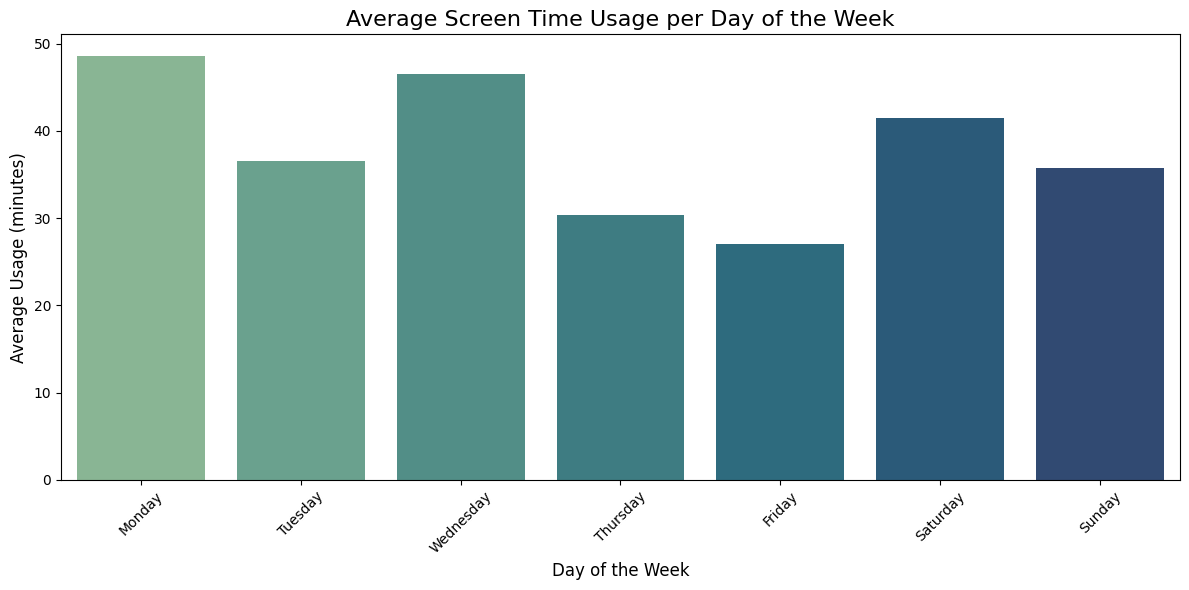

In [40]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")



plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Filtering data for specific apps to analyze daily usage
top_app_data = df[df['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

In [42]:
top_app_data

,Date,App,Usage (minutes),Notifications,Times Opened,Day of week
0,2024-08-07,Instagram,81,24,57,Wednesday
1,2024-08-08,Instagram,90,30,53,Thursday
2,2024-08-26,Instagram,112,33,17,Monday
3,2024-08-22,Instagram,82,11,38,Thursday
4,2024-08-12,Instagram,59,47,16,Monday
...,...,...,...,...,...,...
145,2024-08-25,Netflix,35,0,1,Sunday
146,2024-08-04,Netflix,24,0,1,Sunday
147,2024-08-24,Netflix,78,0,1,Saturday
148,2024-08-03,Netflix,50,1,1,Saturday


In [44]:
daily_app_usage = top_app_data.groupby(['App', 'Day of week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'], 
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()


In [45]:
daily_app_usage

,App,Day of Week,Usage (minutes)
0,Instagram,Monday,85.000000
1,Instagram,Tuesday,80.000000
2,Instagram,Wednesday,90.400000
3,Instagram,Thursday,61.000000
4,Instagram,Friday,60.666667
5,Instagram,Saturday,91.000000
6,Instagram,Sunday,76.750000
7,Netflix,Monday,77.500000
8,Netflix,Tuesday,73.500000
9,Netflix,Wednesday,110.000000


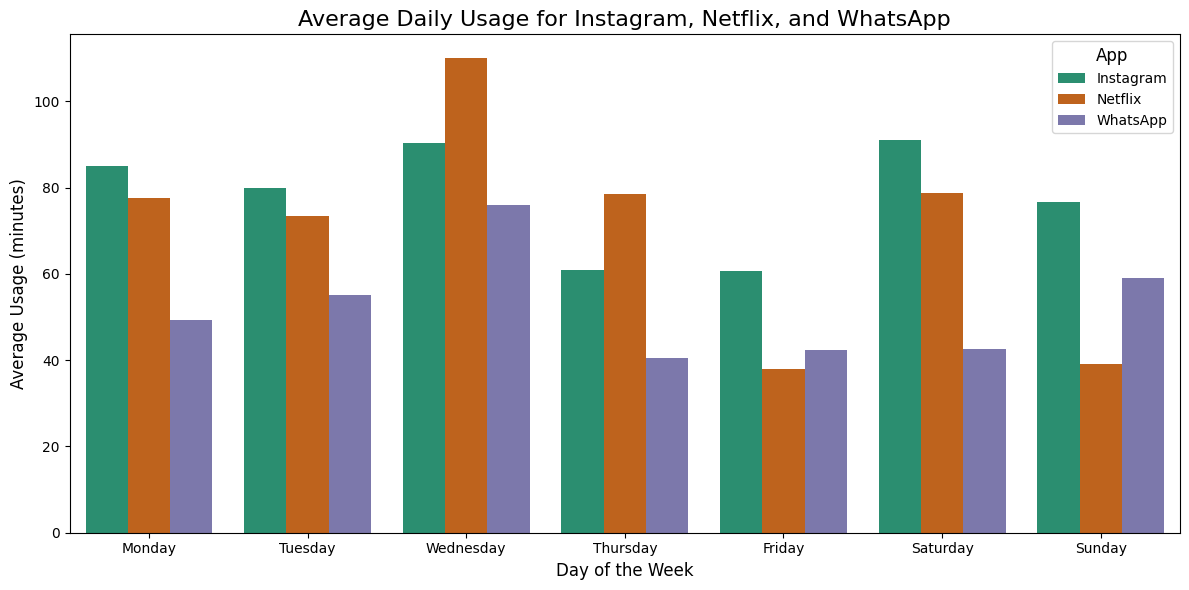

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette='Dark2',estimator= np.mean)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:

notifications_data = df[df['Notifications'] > 0]

In [52]:
notifications_data

,Date,App,Usage (minutes),Notifications,Times Opened,Day of week
0,2024-08-07,Instagram,81,24,57,Wednesday
1,2024-08-08,Instagram,90,30,53,Thursday
2,2024-08-26,Instagram,112,33,17,Monday
3,2024-08-22,Instagram,82,11,38,Thursday
4,2024-08-12,Instagram,59,47,16,Monday
...,...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5,Saturday
196,2024-08-23,LinkedIn,5,7,1,Friday
197,2024-08-18,LinkedIn,19,2,5,Sunday
198,2024-08-26,LinkedIn,21,14,1,Monday


In [ ]:
# Analyzing probability of opening an app after receiving a notification
app_opened= notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

app_opened

C:\Users\USER\AppData\Local\Temp\ipykernel_8776\2043949576.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  app_opened= notifications_data.groupby('App').apply(


,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0


## Conclusion

1. Most Used Apps:

- Instagram, WhatsApp, and Netflix dominate daily screen time.

2. Weekly Trends:

- Screen time usage varies across the week, with peaks on weekends.

3. Notifications and Engagement:

- Apps with more notifications often show higher probabilities of being opened.

4. Insights for App Developers:

- Apps can optimize engagement strategies based on notification frequency and user opening habits.